In [1]:
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("final_census_data.csv", index_col = 0)

# Data Cleaning

In [3]:
data = data.replace('N', np.nan)
data = data.replace('-', np.nan)
data.shape

(3142, 98)

In [4]:
data['STATE'] = data.STATE.str.lstrip()

In [5]:
data.iloc[319, 2]

'District of Columbia'

In [6]:
data.iloc[1456, 1] = "Perry County"
data.iloc[1456, 2] = "Mississippi"
data.iloc[1476, 1] = "Washington County"
data.iloc[1476, 2] = "Mississippi"

In [7]:
# changing health data into percentage

data['PERCENT WITH PRIVATE HEALTH INSURANCE']= 100*data['WITH PRIVATE HEALTH INSURANCE']/data['POPULATION']
data['PERCENT NO PRIVATE HEALTH INSURANCE']= 100*data['NO PRIVATE HEALTH INSURANCE']/data['POPULATION']
data['PERCENT WITH PUBLIC HEALTH INSURANCE']= 100*data['WITH PUBLIC COVERAGE']/data['POPULATION']
data['PERCENT NO PUBLIC HEALTH INSURANCE']= 100*data['NO PUBLIC COVERAGE']/data['POPULATION']
data

,GEO_ID,COUNTY,STATE,POPULATION,AGE15_19,AGE20_24,AGE25_29,AGE30_34,AGE55_59,AGE60_64,...,UNEMP_35-44,UNEMP_45-54,UNEMP_55-59,UNEMP_60-64,UNEMP_65-74,UNEMP_OVER75,PERCENT WITH PRIVATE HEALTH INSURANCE,PERCENT NO PRIVATE HEALTH INSURANCE,PERCENT WITH PUBLIC HEALTH INSURANCE,PERCENT NO PUBLIC HEALTH INSURANCE
0,0500000US01001,Autauga County,Alabama,55200.0,7.0,6.0,6.6,6.2,7.5,4.9,...,3.6,2.4,1.4,3.2,1.5,0.0,64.150362,34.150362,37.731884,60.568841
1,0500000US01003,Baldwin County,Alabama,208107.0,6.1,5.2,5.7,5.5,6.9,7.1,...,2.4,4.4,1.4,2.0,3.2,2.6,72.480022,28.537243,35.510098,65.507167
2,0500000US01005,Barbour County,Alabama,25782.0,5.6,6.4,7.2,7.0,6.4,6.4,...,9.4,5.4,3.4,1.2,3.0,9.2,40.745481,45.857575,49.169964,37.433093
3,0500000US01007,Bibb County,Alabama,22527.0,6.7,6.6,6.9,6.7,6.6,5.4,...,5.0,3.7,0.6,1.9,4.5,0.0,55.440139,35.495184,39.836640,51.098682
4,0500000US01009,Blount County,Alabama,57645.0,6.4,5.5,5.9,5.9,6.8,6.3,...,4.2,3.1,2.5,3.0,2.4,0.0,66.657993,33.015873,36.308440,63.365426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0500000US56037,Sweetwater County,Wyoming,44117.0,7.2,6.2,7.1,7.7,7.0,6.1,...,3.8,4.2,5.5,2.2,3.3,0.0,67.901263,30.160709,21.155110,76.906861
3138,0500000US56039,Teton County,Wyoming,23059.0,4.0,4.8,9.3,9.1,6.4,6.6,...,0.0,0.8,0.0,0.2,5.9,0.0,80.935860,20.451884,20.104948,81.282796
3139,0500000US56041,Uinta County,Wyoming,20609.0,7.2,5.5,5.4,6.5,8.5,5.7,...,9.7,1.3,1.2,0.2,10.6,15.2,78.752002,19.840846,24.688243,73.904605
3140,0500000US56043,Washakie County,Wyoming,8129.0,7.1,5.0,4.6,5.0,7.1,7.5,...,3.8,9.1,11.2,7.4,4.8,0.0,NaN,NaN,NaN,NaN


In [8]:
# additional thought: adding a feature to indicate the health insurance report rate in each state

In [9]:
# numbers of counties in each state
num_of_county = data.groupby('STATE').count()[['GEO_ID']]
num_of_county

,GEO_ID
STATE,
Alabama,67
Alaska,29
Arizona,15
Arkansas,75
California,58
Colorado,64
Connecticut,8
Delaware,3
District of Columbia,1


In [10]:
county_missing = data[data['NO PRIVATE HEALTH INSURANCE'].isnull() == True].groupby('STATE').count()[['GEO_ID']]
county_missing

,GEO_ID
STATE,
Alabama,18
Alaska,24
Arizona,2
Arkansas,39
California,7
Colorado,39
Florida,13
Georgia,70
Hawaii,1


In [11]:
missing_df = 100*county_missing/num_of_county
missing_df = missing_df.replace(np.nan, 0)
missing_df

,GEO_ID
STATE,
Alabama,26.865672
Alaska,82.758621
Arizona,13.333333
Arkansas,52.000000
California,12.068966
Colorado,60.937500
Connecticut,0.000000
Delaware,0.000000
District of Columbia,0.000000


In [12]:
data = data.merge(missing_df, how='outer', on='STATE')
data

,GEO_ID_x,COUNTY,STATE,POPULATION,AGE15_19,AGE20_24,AGE25_29,AGE30_34,AGE55_59,AGE60_64,...,UNEMP_45-54,UNEMP_55-59,UNEMP_60-64,UNEMP_65-74,UNEMP_OVER75,PERCENT WITH PRIVATE HEALTH INSURANCE,PERCENT NO PRIVATE HEALTH INSURANCE,PERCENT WITH PUBLIC HEALTH INSURANCE,PERCENT NO PUBLIC HEALTH INSURANCE,GEO_ID_y
0,0500000US01001,Autauga County,Alabama,55200.0,7.0,6.0,6.6,6.2,7.5,4.9,...,2.4,1.4,3.2,1.5,0.0,64.150362,34.150362,37.731884,60.568841,26.865672
1,0500000US01003,Baldwin County,Alabama,208107.0,6.1,5.2,5.7,5.5,6.9,7.1,...,4.4,1.4,2.0,3.2,2.6,72.480022,28.537243,35.510098,65.507167,26.865672
2,0500000US01005,Barbour County,Alabama,25782.0,5.6,6.4,7.2,7.0,6.4,6.4,...,5.4,3.4,1.2,3.0,9.2,40.745481,45.857575,49.169964,37.433093,26.865672
3,0500000US01007,Bibb County,Alabama,22527.0,6.7,6.6,6.9,6.7,6.6,5.4,...,3.7,0.6,1.9,4.5,0.0,55.440139,35.495184,39.836640,51.098682,26.865672
4,0500000US01009,Blount County,Alabama,57645.0,6.4,5.5,5.9,5.9,6.8,6.3,...,3.1,2.5,3.0,2.4,0.0,66.657993,33.015873,36.308440,63.365426,26.865672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0500000US56037,Sweetwater County,Wyoming,44117.0,7.2,6.2,7.1,7.7,7.0,6.1,...,4.2,5.5,2.2,3.3,0.0,67.901263,30.160709,21.155110,76.906861,56.521739
3138,0500000US56039,Teton County,Wyoming,23059.0,4.0,4.8,9.3,9.1,6.4,6.6,...,0.8,0.0,0.2,5.9,0.0,80.935860,20.451884,20.104948,81.282796,56.521739
3139,0500000US56041,Uinta County,Wyoming,20609.0,7.2,5.5,5.4,6.5,8.5,5.7,...,1.3,1.2,0.2,10.6,15.2,78.752002,19.840846,24.688243,73.904605,56.521739
3140,0500000US56043,Washakie County,Wyoming,8129.0,7.1,5.0,4.6,5.0,7.1,7.5,...,9.1,11.2,7.4,4.8,0.0,NaN,NaN,NaN,NaN,56.521739


In [13]:
data = data.rename(columns={"GEO_ID_x": "GEO_ID", "GEO_ID_y": "PERCENT MISSING HEALTH"})
data

,GEO_ID,COUNTY,STATE,POPULATION,AGE15_19,AGE20_24,AGE25_29,AGE30_34,AGE55_59,AGE60_64,...,UNEMP_45-54,UNEMP_55-59,UNEMP_60-64,UNEMP_65-74,UNEMP_OVER75,PERCENT WITH PRIVATE HEALTH INSURANCE,PERCENT NO PRIVATE HEALTH INSURANCE,PERCENT WITH PUBLIC HEALTH INSURANCE,PERCENT NO PUBLIC HEALTH INSURANCE,PERCENT MISSING HEALTH
0,0500000US01001,Autauga County,Alabama,55200.0,7.0,6.0,6.6,6.2,7.5,4.9,...,2.4,1.4,3.2,1.5,0.0,64.150362,34.150362,37.731884,60.568841,26.865672
1,0500000US01003,Baldwin County,Alabama,208107.0,6.1,5.2,5.7,5.5,6.9,7.1,...,4.4,1.4,2.0,3.2,2.6,72.480022,28.537243,35.510098,65.507167,26.865672
2,0500000US01005,Barbour County,Alabama,25782.0,5.6,6.4,7.2,7.0,6.4,6.4,...,5.4,3.4,1.2,3.0,9.2,40.745481,45.857575,49.169964,37.433093,26.865672
3,0500000US01007,Bibb County,Alabama,22527.0,6.7,6.6,6.9,6.7,6.6,5.4,...,3.7,0.6,1.9,4.5,0.0,55.440139,35.495184,39.836640,51.098682,26.865672
4,0500000US01009,Blount County,Alabama,57645.0,6.4,5.5,5.9,5.9,6.8,6.3,...,3.1,2.5,3.0,2.4,0.0,66.657993,33.015873,36.308440,63.365426,26.865672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0500000US56037,Sweetwater County,Wyoming,44117.0,7.2,6.2,7.1,7.7,7.0,6.1,...,4.2,5.5,2.2,3.3,0.0,67.901263,30.160709,21.155110,76.906861,56.521739
3138,0500000US56039,Teton County,Wyoming,23059.0,4.0,4.8,9.3,9.1,6.4,6.6,...,0.8,0.0,0.2,5.9,0.0,80.935860,20.451884,20.104948,81.282796,56.521739
3139,0500000US56041,Uinta County,Wyoming,20609.0,7.2,5.5,5.4,6.5,8.5,5.7,...,1.3,1.2,0.2,10.6,15.2,78.752002,19.840846,24.688243,73.904605,56.521739
3140,0500000US56043,Washakie County,Wyoming,8129.0,7.1,5.0,4.6,5.0,7.1,7.5,...,9.1,11.2,7.4,4.8,0.0,NaN,NaN,NaN,NaN,56.521739


In [14]:
data = data.drop(['WITH PRIVATE HEALTH INSURANCE', 
           'NO PRIVATE HEALTH INSURANCE', 
           'WITH PUBLIC COVERAGE', 
           'NO PUBLIC COVERAGE'], axis = 1)
feat_cols = data.columns[3:]
data[feat_cols] = data[feat_cols].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 99 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   GEO_ID                                              3142 non-null   object 
 1   COUNTY                                              3142 non-null   object 
 2   STATE                                               3142 non-null   object 
 3   POPULATION                                          3142 non-null   float64
 4   AGE15_19                                            3142 non-null   float64
 5   AGE20_24                                            3142 non-null   float64
 6   AGE25_29                                            3142 non-null   float64
 7   AGE30_34                                            3142 non-null   float64
 8   AGE55_59                                            3142 non-null   float64
 9

In [15]:
data # final_data

,GEO_ID,COUNTY,STATE,POPULATION,AGE15_19,AGE20_24,AGE25_29,AGE30_34,AGE55_59,AGE60_64,...,UNEMP_45-54,UNEMP_55-59,UNEMP_60-64,UNEMP_65-74,UNEMP_OVER75,PERCENT WITH PRIVATE HEALTH INSURANCE,PERCENT NO PRIVATE HEALTH INSURANCE,PERCENT WITH PUBLIC HEALTH INSURANCE,PERCENT NO PUBLIC HEALTH INSURANCE,PERCENT MISSING HEALTH
0,0500000US01001,Autauga County,Alabama,55200.0,7.0,6.0,6.6,6.2,7.5,4.9,...,2.4,1.4,3.2,1.5,0.0,64.150362,34.150362,37.731884,60.568841,26.865672
1,0500000US01003,Baldwin County,Alabama,208107.0,6.1,5.2,5.7,5.5,6.9,7.1,...,4.4,1.4,2.0,3.2,2.6,72.480022,28.537243,35.510098,65.507167,26.865672
2,0500000US01005,Barbour County,Alabama,25782.0,5.6,6.4,7.2,7.0,6.4,6.4,...,5.4,3.4,1.2,3.0,9.2,40.745481,45.857575,49.169964,37.433093,26.865672
3,0500000US01007,Bibb County,Alabama,22527.0,6.7,6.6,6.9,6.7,6.6,5.4,...,3.7,0.6,1.9,4.5,0.0,55.440139,35.495184,39.836640,51.098682,26.865672
4,0500000US01009,Blount County,Alabama,57645.0,6.4,5.5,5.9,5.9,6.8,6.3,...,3.1,2.5,3.0,2.4,0.0,66.657993,33.015873,36.308440,63.365426,26.865672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0500000US56037,Sweetwater County,Wyoming,44117.0,7.2,6.2,7.1,7.7,7.0,6.1,...,4.2,5.5,2.2,3.3,0.0,67.901263,30.160709,21.155110,76.906861,56.521739
3138,0500000US56039,Teton County,Wyoming,23059.0,4.0,4.8,9.3,9.1,6.4,6.6,...,0.8,0.0,0.2,5.9,0.0,80.935860,20.451884,20.104948,81.282796,56.521739
3139,0500000US56041,Uinta County,Wyoming,20609.0,7.2,5.5,5.4,6.5,8.5,5.7,...,1.3,1.2,0.2,10.6,15.2,78.752002,19.840846,24.688243,73.904605,56.521739
3140,0500000US56043,Washakie County,Wyoming,8129.0,7.1,5.0,4.6,5.0,7.1,7.5,...,9.1,11.2,7.4,4.8,0.0,NaN,NaN,NaN,NaN,56.521739


In [16]:
data.to_csv(r'final_census_cleaned.csv', index = True)

# Kmeans Clustering

In [17]:
health_cols = data.columns[94:98]
health_cols

Index(['PERCENT WITH PRIVATE HEALTH INSURANCE',
       'PERCENT NO PRIVATE HEALTH INSURANCE',
       'PERCENT WITH PUBLIC HEALTH INSURANCE',
       'PERCENT NO PUBLIC HEALTH INSURANCE'],
      dtype='object')

In [18]:
# removing healthcare columns
data_noHealth = data.drop(health_cols, axis = 1)
data_noHealth.shape

(3142, 95)

In [19]:
# feature matrix - without healthcare columns
X_cols = data_noHealth.columns[3:]
X = data_noHealth[X_cols]
X

,POPULATION,AGE15_19,AGE20_24,AGE25_29,AGE30_34,AGE55_59,AGE60_64,TOTAL_MALE,TOTAL_FEMALE,PERCENT_FEMALE,...,UNEMP_20-24,UNEMP_25-29,UNEMP_30-34,UNEMP_35-44,UNEMP_45-54,UNEMP_55-59,UNEMP_60-64,UNEMP_65-74,UNEMP_OVER75,PERCENT MISSING HEALTH
0,55200.0,7.0,6.0,6.6,6.2,7.5,4.9,26874.0,28326.0,51.315217,...,12.7,3.6,3.7,3.6,2.4,1.4,3.2,1.5,0.0,26.865672
1,208107.0,6.1,5.2,5.7,5.5,6.9,7.1,101188.0,106919.0,51.376936,...,9.7,8.6,2.2,2.4,4.4,1.4,2.0,3.2,2.6,26.865672
2,25782.0,5.6,6.4,7.2,7.0,6.4,6.4,13697.0,12085.0,46.873788,...,11.9,20.3,14.1,9.4,5.4,3.4,1.2,3.0,9.2,26.865672
3,22527.0,6.7,6.6,6.9,6.7,6.6,5.4,12152.0,10375.0,46.055844,...,19.1,8.8,16.8,5.0,3.7,0.6,1.9,4.5,0.0,26.865672
4,57645.0,6.4,5.5,5.9,5.9,6.8,6.3,28434.0,29211.0,50.673953,...,8.6,2.9,2.3,4.2,3.1,2.5,3.0,2.4,0.0,26.865672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,44117.0,7.2,6.2,7.1,7.7,7.0,6.1,22882.0,21235.0,48.133373,...,5.2,7.1,4.8,3.8,4.2,5.5,2.2,3.3,0.0,56.521739
3138,23059.0,4.0,4.8,9.3,9.1,6.4,6.6,11911.0,11148.0,48.345548,...,2.2,2.3,3.0,0.0,0.8,0.0,0.2,5.9,0.0,56.521739
3139,20609.0,7.2,5.5,5.4,6.5,8.5,5.7,10505.0,10104.0,49.027124,...,13.6,9.4,2.1,9.7,1.3,1.2,0.2,10.6,15.2,56.521739
3140,8129.0,7.1,5.0,4.6,5.0,7.1,7.5,4137.0,3992.0,49.108131,...,3.2,8.6,1.9,3.8,9.1,11.2,7.4,4.8,0.0,56.521739


In [20]:
# imputing non-health data
imputer = KNNImputer(n_neighbors = 3) # n_neighbors = 5 yields very similar results
# imputer = SimpleImputer(strategy = "mean")

# Neither imputer results in good clustering

In [21]:
# filling in missing values in feature matrix (w/o health data)
X = imputer.fit_transform(X)

In [22]:
# kmeans clustering
kmeans = KMeans(n_clusters=50, random_state=0).fit(X)

In [23]:
data_noHealth.insert(3, "LABEL", kmeans.labels_, True) 
data_noHealth.shape

(3142, 96)

In [24]:
label = data_noHealth.loc[:, ['GEO_ID', 'LABEL']]

In [25]:
data = label.merge(data, how='outer', on='GEO_ID', left_index=True)

In [26]:
data

,GEO_ID,LABEL,COUNTY,STATE,POPULATION,AGE15_19,AGE20_24,AGE25_29,AGE30_34,AGE55_59,...,UNEMP_45-54,UNEMP_55-59,UNEMP_60-64,UNEMP_65-74,UNEMP_OVER75,PERCENT WITH PRIVATE HEALTH INSURANCE,PERCENT NO PRIVATE HEALTH INSURANCE,PERCENT WITH PUBLIC HEALTH INSURANCE,PERCENT NO PUBLIC HEALTH INSURANCE,PERCENT MISSING HEALTH
0,0500000US01001,45,Autauga County,Alabama,55200.0,7.0,6.0,6.6,6.2,7.5,...,2.4,1.4,3.2,1.5,0.0,64.150362,34.150362,37.731884,60.568841,26.865672
1,0500000US01003,18,Baldwin County,Alabama,208107.0,6.1,5.2,5.7,5.5,6.9,...,4.4,1.4,2.0,3.2,2.6,72.480022,28.537243,35.510098,65.507167,26.865672
2,0500000US01005,48,Barbour County,Alabama,25782.0,5.6,6.4,7.2,7.0,6.4,...,5.4,3.4,1.2,3.0,9.2,40.745481,45.857575,49.169964,37.433093,26.865672
3,0500000US01007,48,Bibb County,Alabama,22527.0,6.7,6.6,6.9,6.7,6.6,...,3.7,0.6,1.9,4.5,0.0,55.440139,35.495184,39.836640,51.098682,26.865672
4,0500000US01009,45,Blount County,Alabama,57645.0,6.4,5.5,5.9,5.9,6.8,...,3.1,2.5,3.0,2.4,0.0,66.657993,33.015873,36.308440,63.365426,26.865672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0500000US56037,0,Sweetwater County,Wyoming,44117.0,7.2,6.2,7.1,7.7,7.0,...,4.2,5.5,2.2,3.3,0.0,67.901263,30.160709,21.155110,76.906861,56.521739
3138,0500000US56039,48,Teton County,Wyoming,23059.0,4.0,4.8,9.3,9.1,6.4,...,0.8,0.0,0.2,5.9,0.0,80.935860,20.451884,20.104948,81.282796,56.521739
3139,0500000US56041,48,Uinta County,Wyoming,20609.0,7.2,5.5,5.4,6.5,8.5,...,1.3,1.2,0.2,10.6,15.2,78.752002,19.840846,24.688243,73.904605,56.521739
3140,0500000US56043,11,Washakie County,Wyoming,8129.0,7.1,5.0,4.6,5.0,7.1,...,9.1,11.2,7.4,4.8,0.0,NaN,NaN,NaN,NaN,56.521739


In [27]:
import seaborn as sns

def plot_dist(data, x, y):
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=x, y=y, data=data)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y.lower(), fontsize=15)
    plt.axhline(np.mean(data[y]))
    plt.xticks(fontsize=13)

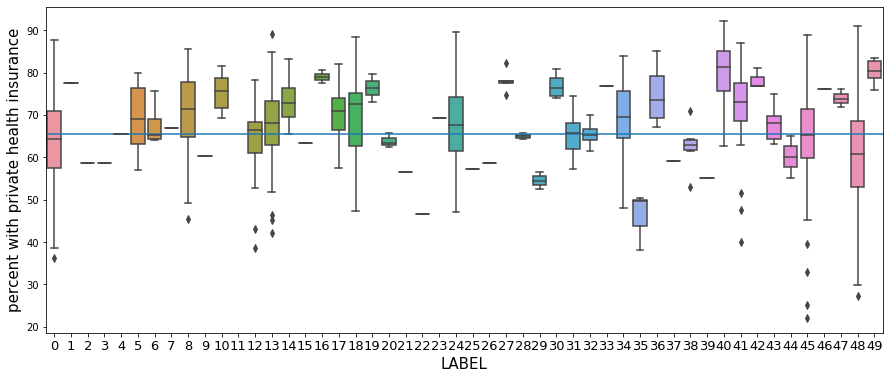

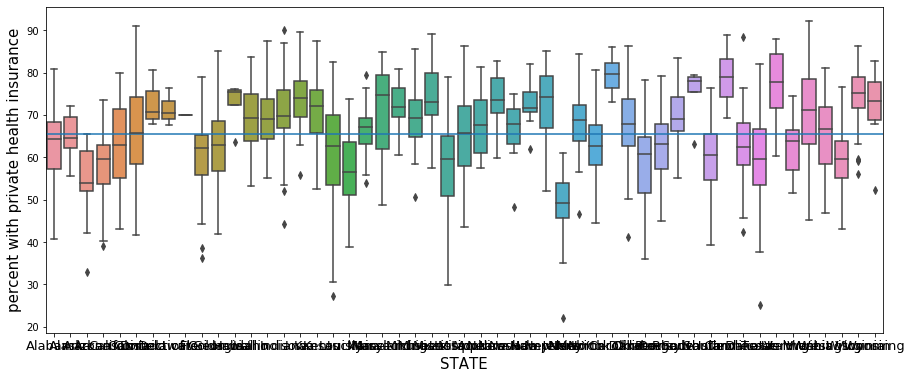

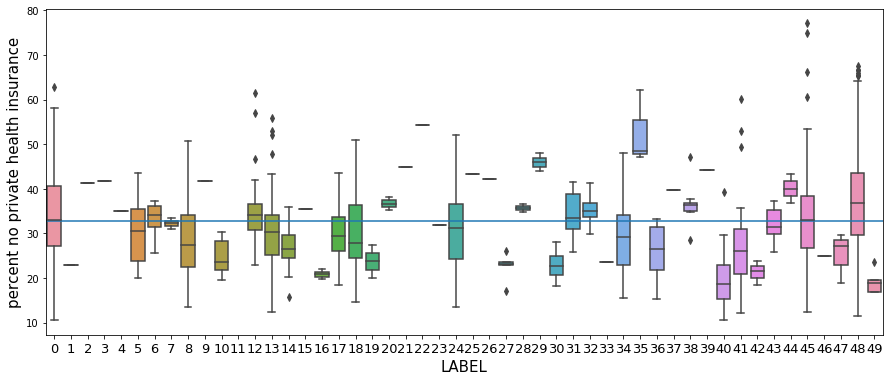

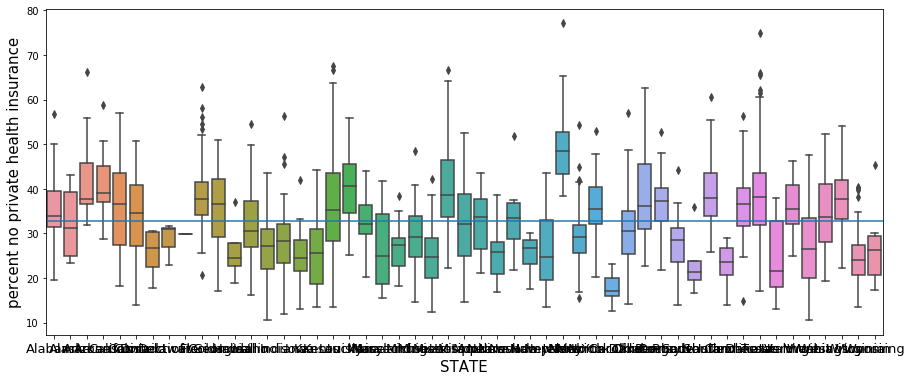

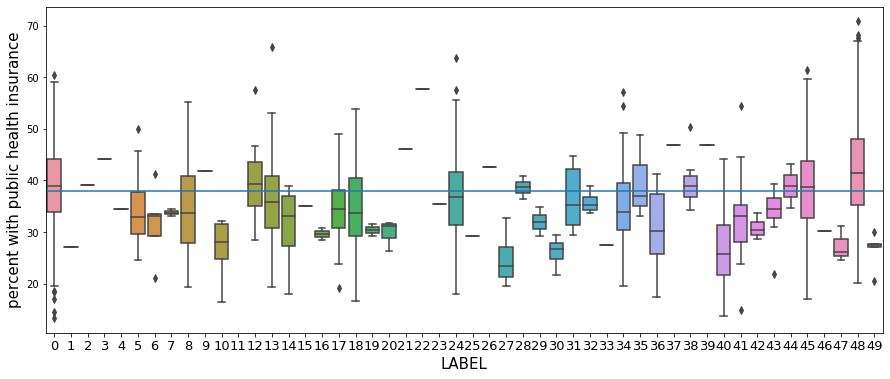

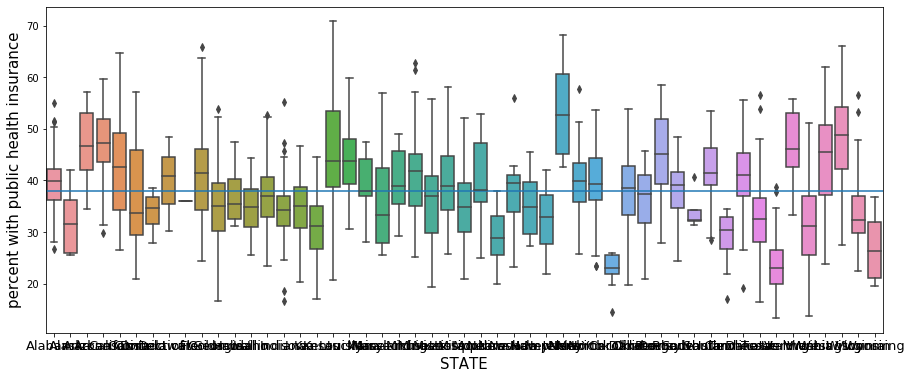

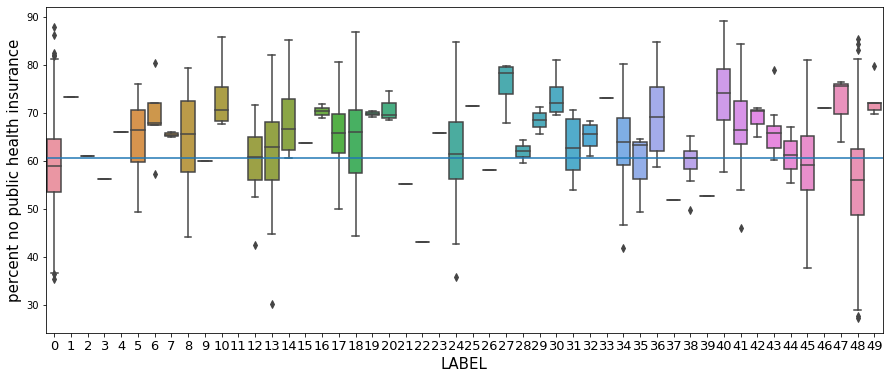

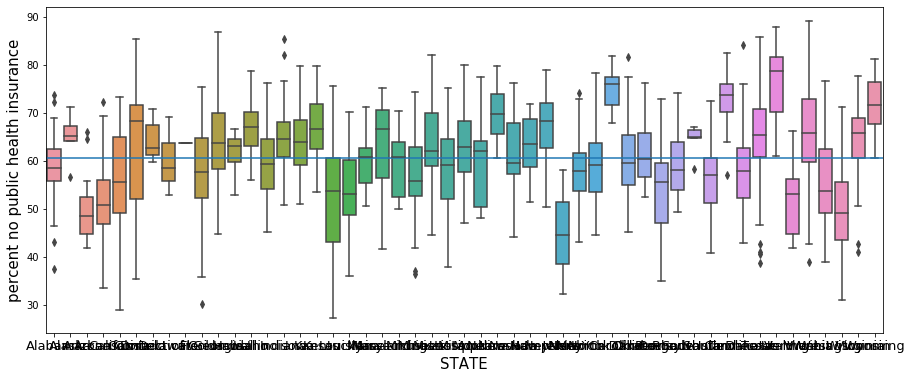

In [28]:
# Comparing kmeans clusters to states as clusters
plot_dist(data,'LABEL','PERCENT WITH PRIVATE HEALTH INSURANCE')
plot_dist(data,'STATE','PERCENT WITH PRIVATE HEALTH INSURANCE')

plot_dist(data,'LABEL','PERCENT NO PRIVATE HEALTH INSURANCE')
plot_dist(data,'STATE','PERCENT NO PRIVATE HEALTH INSURANCE')

plot_dist(data,'LABEL','PERCENT WITH PUBLIC HEALTH INSURANCE')
plot_dist(data,'STATE','PERCENT WITH PUBLIC HEALTH INSURANCE')

plot_dist(data,'LABEL','PERCENT NO PUBLIC HEALTH INSURANCE')
plot_dist(data,'STATE','PERCENT NO PUBLIC HEALTH INSURANCE')

In [29]:
# Checking how big is each cluster
data.groupby('LABEL').count()[['GEO_ID']]
# Very unbalanced

,GEO_ID
LABEL,
0,429
1,1
2,1
3,1
4,1
5,32
6,5
7,2
8,88


In [30]:
# Conclusion: kmeans cluster is not a good way to impute missing healthcare data
# Solution: k_neighbor = 1